# Load in CSV

I decided to load in the csv with pandas as a dataframe as opposed to a python dictionary due to the ease of reading 
the data in a spreadsheet format.

In [72]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('/home/matthew/Desktop/Online_Classes/Udacity/Data_Analyst_Nanodegree/P2/Final_Project/titanic_\
data.csv')

titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Wrangling the Data

The code below will change the zeros and ones in the 'Survived' column to 'no' and 'yes' respectively.  I decided to do this because it's easier to remember. 

In [73]:
titanic_df.replace({'Survived': {0: 'no', 1: 'yes'}}, inplace=True)

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Because there are missing values in some of the columns, I decided to find out where these missing values were and how
many there were in each column.

In [74]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Because 'Cabin' and 'Embarked' are not part of my analysis, I will not worry about the 'NaN' values in those columns.  Also, while I will use 'Age' in my analysis, nothing special needs to be done about these missing values because, according to the pandas documentation found in the link below, the computational methods I will use below "are all written to account for missing data".
- http://pandas.pydata.org/pandas-docs/stable/missing_data.html  

I printed out the table below to get a statistical overview of the data set.  However, as the data shows below, the 25, 50, and 75% quantiles for 'Age' couldn't be calculated.  I assume this is because of the missing data.

In [75]:
titanic_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploring the Data

## Research Questions

- What were the survival rates of the passengers based on Age, Sex, Pclass, SibSp, and Parch?
- Who was most likely to survive?

First, I wanted to get a general overview of survivability for all passengers on board.  It's clear from the data shown
that most of the passengers didn't survive.

The link below is where I got the code for using unstack to make the tables and charts below, and to convert the raw 
numbers in to percentages:
- https://discussions.udacity.com/t/quick-graphs-from-groupbys-plot-histograms-etc/192409/2

In [76]:
survival_totals = titanic_df.groupby('Survived').count()['PassengerId']
total_survival_rates = survival_totals.divide(survival_totals.sum(axis=0))*100
total_survival_rates

Survived
no     61.616162
yes    38.383838
Name: PassengerId, dtype: float64

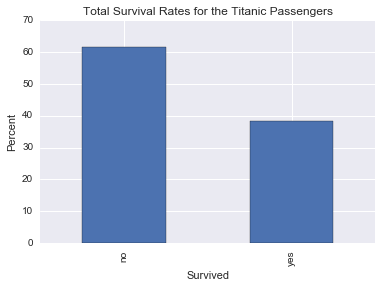

In [77]:
total_survival_rates.plot(kind='bar', title='Total Survival Rates for the Titanic Passengers').set(ylabel='Percent')

In order to analyze the survival rates of the passengers based on age, I decided to convert the ages into age ranges
due to the large number of individual ages.  To do that I used the convert_age function to create the age ranges, and
then created a new column for the age ranges be applying the function to the 'Ages' column and setting the new 
"Age_Range" column equal to the function's output.
Next, I set the survival_by_age variable equal to the raw totals, and I then converted the the raw totals into 
percentages and set those equal to the survival_rates_by_age variable.

The link for the convert_age function below can be found here:
- https://discussions.udacity.com/t/p2-investigate-a-dataset-apply-cut-function/40550/3

In [78]:
def convert_age(age):
    return pd.cut(age, bins = [0,10,20,30,40,50,60,70,80])

titanic_df['Age_Range'] = convert_age(titanic_df['Age'])
        
survival_by_age = titanic_df.groupby(['Survived', 'Age_Range'], as_index=False).size().unstack('Survived')
survival_rates_by_age = survival_by_age.divide(survival_by_age.sum(axis=1),axis=0)*100
survival_rates_by_age

Survived,no,yes
Age_Range,,
"(0, 10]",40.625000,59.375000
"(10, 20]",61.739130,38.260870
"(20, 30]",63.478261,36.521739
"(30, 40]",55.483871,44.516129
"(40, 50]",61.627907,38.372093
"(50, 60]",59.523810,40.476190
"(60, 70]",76.470588,23.529412
"(70, 80]",80.000000,20.000000


I then used the line chart below to show the data in visual form.  I chose to use a line chart for this data, and two
other sets of data below analyzing survival rates for SibSp and Parch, due to the large number of data points along the 
x-axis.  The trend of the data was easier to see on a line chart as apposed to a bar chart.  For the sets of data below 
analyzing survival rates for Sex and Pclass, a bar chart was enough to visualize the trend of the data due to the smaller
number of data points along the x_axis.

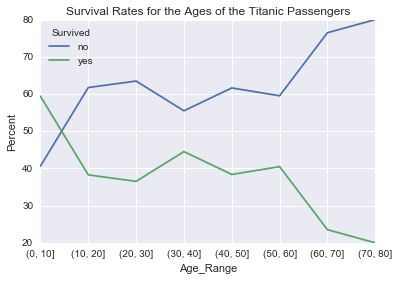

In [79]:
survival_rates_by_age.plot(title='Survival Rates for the Ages of the Titanic Passengers').set(ylabel='Percent')

For the rest of the analysis to follow, I do the same procedure as above.  I set a 'survival_by_xx' variable equal to the
raw totals, and I then convert the the raw totals into percentages and set those equal to a survival_rates_by_xx 
variable.

As the data shows below, the survival and death rates for females and males were almost perfectly flipped.  It wasn't
good to be a male on the titanic while it was sinking.

In [80]:
survival_by_sex = titanic_df.groupby(['Survived', 'Sex']).size().unstack('Survived')
survival_rates_by_sex= survival_by_sex.divide(survival_by_sex.sum(axis=1),axis=0)*100
survival_rates_by_sex

Survived,no,yes
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


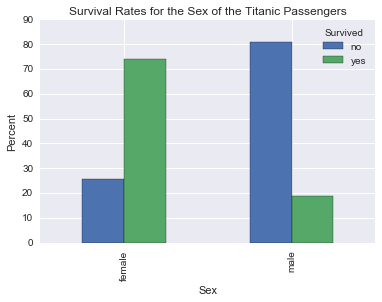

In [81]:
survival_rates_by_sex.plot(kind='bar', title='Survival Rates for the Sex of the Titanic Passengers').set(ylabel='Percent')

As the data shows below, the death rate for 3rd class passengers was not good, 2nd class passengers were almost equally
likely to have survived or died, and 1st class passengers were the most likely to have survived.  It wasn't good to be a 3rd class passenger on the titanic while it was sinking.

In [82]:
survival_by_pclass = titanic_df.groupby(['Survived', 'Pclass']).size().unstack('Survived')
survival_rates_by_pclass = survival_by_pclass.divide(survival_by_pclass.sum(axis=1),axis=0)*100
survival_rates_by_pclass

Survived,no,yes
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.763747,24.236253


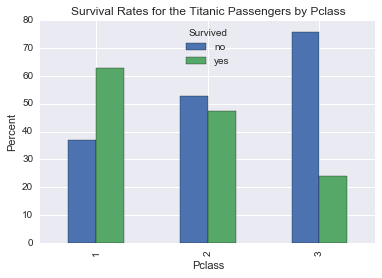

In [83]:
survival_rates_by_pclass.plot(kind='bar', title='Survival Rates for the Titanic Passengers by Pclass')\
.set(ylabel='Percent')

In [84]:
survival_by_sibsp = titanic_df.groupby(['Survived', 'SibSp']).size().unstack('Survived')
survival_rates_by_sibsp= survival_by_sibsp.divide(survival_by_sibsp.sum(axis=1),axis=0)*100
survival_rates_by_sibsp

Survived,no,yes
SibSp,,
0,65.460526,34.539474
1,46.411483,53.588517
2,53.571429,46.428571
3,75.000000,25.000000
4,83.333333,16.666667
5,100.000000,NaN
8,100.000000,NaN


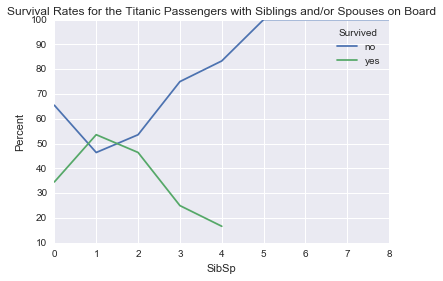

In [85]:
survival_rates_by_sibsp.plot(title='Survival Rates for the Titanic Passengers with Siblings and/or Spouses on Board')\
.set(ylabel='Percent')

In [86]:
survival_by_parch = titanic_df.groupby(['Survived', 'Parch']).size().unstack('Survived')
survival_rates_by_parch= survival_by_parch.divide(survival_by_parch.sum(axis=1),axis=0)*100
survival_rates_by_parch

Survived,no,yes
Parch,,
0,65.634218,34.365782
1,44.915254,55.084746
2,50.000000,50.000000
3,40.000000,60.000000
4,100.000000,NaN
5,80.000000,20.000000
6,100.000000,NaN


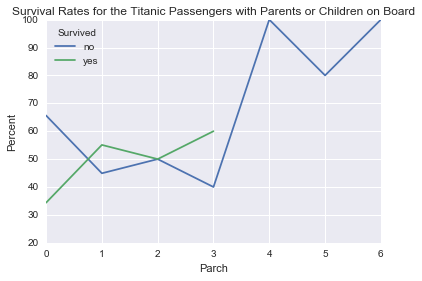

In [87]:
survival_rates_by_parch.plot(title='Survival Rates for the Titanic Passengers with Parents or Children on Board')\
.set(ylabel='Percent')

# Conclusion

The data above shows that for age, the only age group that had a survival rate greater than it's death rate was the
0-10 age group.  Passengers in that age group had about a 17.6% greater chance of surviving than dying, while every other group had better chances of dying.  While there was a spike in the middle age ranges of 30-40 and 40-50, there is a general downward trend with the survival rate dropping with increased age.

For sex, the numbers are clear.  Females had a 74.2% survival rate, while males had a 81.1% death rate.  Being a women on
the Titanic greatly increased a passengers chance of survival.

For class, 1st class passengers had the only survival rate greater than the death rate at a 63% chance of survival.
2nd and 3rd class passengers all had death rates greater than their survival rates with 3rd class passengers having the 
least chance of survival with a death rate of about 76%.

For people with siblings or spouses on board, the only group that had a higher chance of surviving was the group with 
either one sibling or spouse on board at a 53.6% survival rate.  Other than that, there is a clear downward trend with
increased numbers of siblings or spouses on board.

Finally, there doesn't seem to be any clear trend for people with parents or children on board either.  The only groups
with better chances of survival was were the passengers with either one or three parents or children on board.  The rates
for those groups were 55.1% and 60% respectively.

In conclusion,  while the overall chances of survival for passengers on the titanic was low at 38.4%, the groups that 
had clear signs of the greatest chances of survival were females, 1st class passengers, young children age 10 or below, 
passengers with only one sibling or spouse on board, and passengers with either one or three parents or children on 
board.

However, these findings should be taken with a grain of salt due to the limitations of the data.  In the SibSp and Parch categories, for example, the vast majority of passengers had either zero or one siblings or spouses on board, and the vast majority of passengers also only had zero, one or two parents and/or children on board.  While I think this is to be expected, we can't know for sure how the trends in these categories might have changed with more passengers having higher numbers of family members on board.  As a result, we shouldn't draw any conclusions about the positive or negative affects of having high numbers of family members on board.

The totals can be seen in the tables below.

In [88]:
survival_by_sibsp

Survived,no,yes
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


In [89]:
survival_by_parch

Survived,no,yes
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


Also, because about 20% of passenger ages are missing, some caution needs to be taken with the conclusions of survivability based on age.  While I don't think things would change too drastically, we don't know for sure how the findings would change with a complete set of ages.

###Side Note###
For further research I would like to look into the connections between the groups that had the greatest chances of survival and try to find out why they had the greatest chances of survival.  For example, did first class passengers have the highest chances of survival because there were more women in first class than any other class, or visa versa?  Did the cabin location of each passenger play a role in their survival rates?  Did the age distribution between the sexes and the different classes play any role in survival?